# Workflow of Exploratory Data Analysis 

1. Import relevant libraries and datasets 
2. Data Cleaning
3. Feature Engineering 
4. Exploratory Data Analysis 

        (a) Demographics of the Members
        (b) How does the demographics interact with the other features? 
5. Recommendations
        

## 1. Import relevant libraries and datasets

In [28]:
# import relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as datetime

In [29]:
# Import datasets 

consult = pd.read_csv(r'C:\Users\yeosi\Documents\WhiteCoat test\WhiteCoat - Datasets\consults.csv')
diagnoses = pd.read_csv(r'C:\Users\yeosi\Documents\WhiteCoat test\WhiteCoat - Datasets\diagnoses.csv')
patients = pd.read_csv(r'C:\Users\yeosi\Documents\WhiteCoat test\WhiteCoat - Datasets\patients.csv')
presc = pd.read_csv(r'C:\Users\yeosi\Documents\WhiteCoat test\WhiteCoat - Datasets\prescriptions.csv')

## 2. Data Cleaning

In [30]:
# Check for null data in individual dataset
data = [consult, diagnoses, patients, presc]
for i in data:
    print(i.isnull().sum())

consult_date                 0
consult_id                   0
doctor_id                    0
member_id                    0
is_under_insurance           0
mc_days                      0
is_referral_letter_issued    0
delivery_type                0
consult_revenue              0
dtype: int64
consult_id        0
diagnosis_code    0
is_chronic        0
dtype: int64
member_id     0
member_dob    0
gender        0
dtype: int64
consult_id               0
medication_id            0
prescription_quantity    0
is_med_bought            0
dtype: int64


In [31]:
# joining consult, patients, diagnoses and prescription tables tgt using common unique IDs 
df = consult.merge(diagnoses, on='consult_id', how='left')
df = df.merge(patients, on = 'member_id', how = 'left')
df = pd.merge(df,presc[['consult_id','is_med_bought']],on='consult_id', how='left')

In [32]:
# Merge only consult, diagnoses and patients tables for another dataset to be used in EDA
df1 = consult.merge(diagnoses, on='consult_id', how='left')
df1 = df1.merge(patients, on = 'member_id', how = 'left')

In [33]:
df.head()

,consult_date,consult_id,doctor_id,member_id,is_under_insurance,mc_days,is_referral_letter_issued,delivery_type,consult_revenue,diagnosis_code,is_chronic,member_dob,gender,is_med_bought
0,2021-12-21,DEA68B5C-5D7D-4B38-A271-37569237446B,B045D798-DC64-4CA9-9FC4-28691E82EB72,DF1B5629-AD7E-4C8C-A680-00409348671D,True,5,False,2,0.276809,J06.9,False,1996-08-07,Male,True
1,2021-12-21,DEA68B5C-5D7D-4B38-A271-37569237446B,B045D798-DC64-4CA9-9FC4-28691E82EB72,DF1B5629-AD7E-4C8C-A680-00409348671D,True,5,False,2,0.276809,J06.9,False,1996-08-07,Male,True
2,2021-12-21,DEA68B5C-5D7D-4B38-A271-37569237446B,B045D798-DC64-4CA9-9FC4-28691E82EB72,DF1B5629-AD7E-4C8C-A680-00409348671D,True,5,False,2,0.276809,J06.9,False,1996-08-07,Male,True
3,2021-12-21,DEA68B5C-5D7D-4B38-A271-37569237446B,B045D798-DC64-4CA9-9FC4-28691E82EB72,DF1B5629-AD7E-4C8C-A680-00409348671D,True,5,False,2,0.276809,J06.9,False,1996-08-07,Male,True
4,2021-10-23,9A3EE59A-16F0-496A-BAFC-762D971CF3E1,77EFF8BB-D181-4BFB-90A4-75FA494F4BBB,403B5A76-B815-461D-B90A-0082AA9F6EA4,False,5,False,1,-0.665552,U07.2,False,1965-04-28,Unspecified,NaN


In [34]:
df1.head()

,consult_date,consult_id,doctor_id,member_id,is_under_insurance,mc_days,is_referral_letter_issued,delivery_type,consult_revenue,diagnosis_code,is_chronic,member_dob,gender
0,2021-12-21,DEA68B5C-5D7D-4B38-A271-37569237446B,B045D798-DC64-4CA9-9FC4-28691E82EB72,DF1B5629-AD7E-4C8C-A680-00409348671D,True,5,False,2,0.276809,J06.9,False,1996-08-07,Male
1,2021-10-23,9A3EE59A-16F0-496A-BAFC-762D971CF3E1,77EFF8BB-D181-4BFB-90A4-75FA494F4BBB,403B5A76-B815-461D-B90A-0082AA9F6EA4,False,5,False,1,-0.665552,U07.2,False,1965-04-28,Unspecified
2,2021-12-13,37EC1191-EF75-4646-977C-88C4107907F3,44F5B766-8B80-456E-8797-5CF9893D6AE4,B4F5C92E-968E-4AB6-BEF7-01D089943DEE,False,0,False,1,-0.387127,M54.5,False,1986-02-08,Female
3,2021-11-21,71A029EF-443D-454A-AC02-1A5BD5470EF9,EB022DC9-CBDB-4E11-950B-ECBB2287E2C3,FCCF8A81-5160-48D2-8ED7-0098BE77BB0B,True,0,False,1,-0.922559,Others,False,1994-10-03,Female
4,2021-10-03,DA343730-4BE3-4338-BEC8-8B92B4E18F98,7C2FDBF3-2942-47AD-AE19-ECC6F4E115E9,6D2786A5-48A1-4135-983D-01F3B11BD49A,True,1,False,2,-0.097994,R51,False,1991-11-15,Female


In [35]:
df.isnull().sum()

consult_date                    0
consult_id                      0
doctor_id                       0
member_id                       0
is_under_insurance              0
mc_days                         0
is_referral_letter_issued       0
delivery_type                   0
consult_revenue                 0
diagnosis_code                  4
is_chronic                      4
member_dob                      0
gender                          0
is_med_bought                5591
dtype: int64

In [36]:
df1.isnull().sum()

consult_date                 0
consult_id                   0
doctor_id                    0
member_id                    0
is_under_insurance           0
mc_days                      0
is_referral_letter_issued    0
delivery_type                0
consult_revenue              0
diagnosis_code               2
is_chronic                   2
member_dob                   0
gender                       0
dtype: int64

There are null values observed in a few columns such as diagnosis_code, is_chronic. However, we will leave the null values for now and see how it interacts with the data in the EDA section. 

## 3. Feature Engineering

In [37]:
# Extract the month out of consult_date 
df['month'] = pd.DatetimeIndex(df['consult_date']).month
df1['month'] = pd.DatetimeIndex(df1['consult_date']).month

In [38]:
# Create a function to get the age of member
def from_dob_to_age(born):
    born = pd.to_datetime(born)
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [39]:
# Apply function to df
df['age'] = df['member_dob'].apply(lambda x: from_dob_to_age(x))

In [41]:
# Apply function to df1
df1['age'] = df1['member_dob'].apply(lambda x: from_dob_to_age(x))

In [43]:
# Observe the unique values of each columns 
for i in df.columns:
    print(f'{i}\n', df[i].unique())

consult_date
 ['2021-12-21' '2021-10-23' '2021-12-13' '2021-11-21' '2021-10-03'
 '2021-11-01' '2021-11-16' '2021-12-01' '2021-10-31' '2021-10-27'
 '2021-10-01' '2021-11-23' '2021-12-23' '2021-10-20' '2021-12-02'
 '2021-10-11' '2021-12-31' '2021-12-28' '2021-12-07' '2021-11-19'
 '2021-11-22' '2021-11-11' '2021-12-20' '2021-11-05' '2021-11-12'
 '2021-12-17' '2021-10-18' '2021-11-29' '2021-12-11' '2021-11-10'
 '2021-10-13' '2021-10-06' '2021-12-09' '2021-10-04' '2021-11-02'
 '2021-12-10' '2021-12-04' '2021-10-14' '2021-11-15' '2021-10-05'
 '2021-12-29' '2021-12-27' '2021-11-08' '2021-11-06' '2021-12-03'
 '2021-11-24' '2021-12-14' '2021-12-06' '2021-10-26' '2021-11-13'
 '2021-11-09' '2021-10-25' '2021-12-15' '2021-10-07' '2021-12-18'
 '2021-12-22' '2021-11-14' '2021-10-28' '2021-11-18' '2021-10-12'
 '2021-12-08' '2021-10-02' '2021-12-05' '2021-10-29' '2021-11-04'
 '2021-12-12' '2021-11-25' '2021-10-30' '2021-11-30' '2021-11-27'
 '2021-10-17' '2021-10-08' '2021-12-16' '2021-11-17' '2021-11-

## 4. Exploratory Data Analysis 

Since we would like to identify different user segments, the EDA section can start off with exploring the demographics of the members , followed by their interactions with other features such as insurance, MC days, consult revenue and delivery type. 


### (a) Demographics of the Members

#### 1. Age of members

Text(0.5, 1.0, "Histogram for Members' Age")

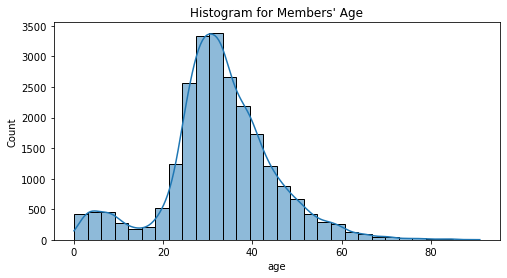

In [44]:
plt.figure(figsize = (8,4))
sns.histplot(x = 'age',data = df1, palette = 'Set2', bins = 30, kde = True).set_title ("Histogram for Members' Age")

The age of the members are quite normally distributed and their ages commonly range between 25 to 40 years old. This might also be the age group where they are more tech-savvy and are able to navigate well with tele-health services on the app. Tele-health services seem to be more popular/widely used in this age group. 

#### 2. Gender 

Text(0.5, 1.0, 'Countplot for Gender')

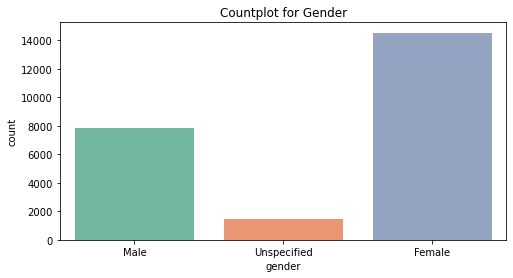

In [45]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'gender',data = df1, palette = 'Set2').set_title ("Countplot for Gender")

There are more female users compared to males users. Perhaps this could be a point worthy of a dive-in later on as we would like to know more about why females are the dominant group in this case. 

#### 3. Demographics by consultation months 


Text(0.5, 1.0, 'Proportion of Gender by Month')

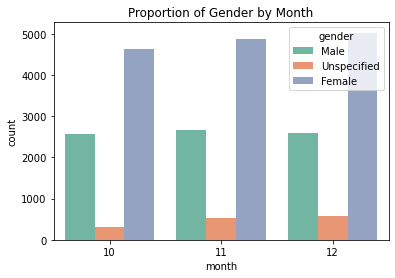

In [46]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'month',data = df1, palette = 'Set2', hue = 'gender').set_title ("Proportion of Gender by Month")

Text(0.5, 1.0, 'Distribution of Ages by Month')

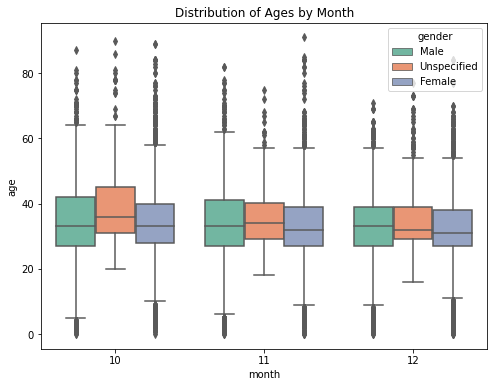

In [47]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'month', y = 'age', data = df1, palette = 'Set2', hue = 'gender').set_title ("Distribution of Ages by Month")

The average age of each gender seems to be quite consistent throughout the months. Therefore, time factor might not be as influential on the demographics in this case. It would be better if we have data for a longer period of time. 

### (b) How does the demographics interact with the other features? 

**Some guiding questions:** 

**1. Does a specific group by gender or age tend to not be covered under insurance?**** 
    
    - If so, does it affect their decision in purchasing the medicine prescribed?
    - Is this group of people mostly suffering from chronic diseases or mostly had a referral letter issued? If they are, this could be a problem as they are the ones who should be covered under insurance due to the medical bills incurred. 
    - What are the top diagnosis codes for these groups? 


**2. Does a specific group by gender or age tend to choose a specific delivery type?** 

    - If so, are they mostly suffering from chronic diseases?
    - Does having insurance affect their decision to choose a certain delivery type? 
    - Does it affect the consult revenue? 


**3. Does a specific group by gender or age tend to bring in more consult revenue?**

    - What kind of delivery types / medicines do they usually get?
    - Would their decision to purchase medicine affect consult revenue as a whole? 
    - Would having insurance affect the consult revenue? 

#### 1. Does a specific group by gender or age tend to not be covered under insurance?
    
    - If so, does it affect their decision in purchasing the medicine prescribed?
    - Is this group of people mostly suffering from chronic diseases or mostly had a referral letter issued? If they are, this could be a problem as they are the ones who should be covered under insurance due to the medical bills incurred. 
    - What are the top diagnosis codes for these groups? 

Text(0.5, 1.0, 'Countplot of Members who purchased medicine covered under Insurance')

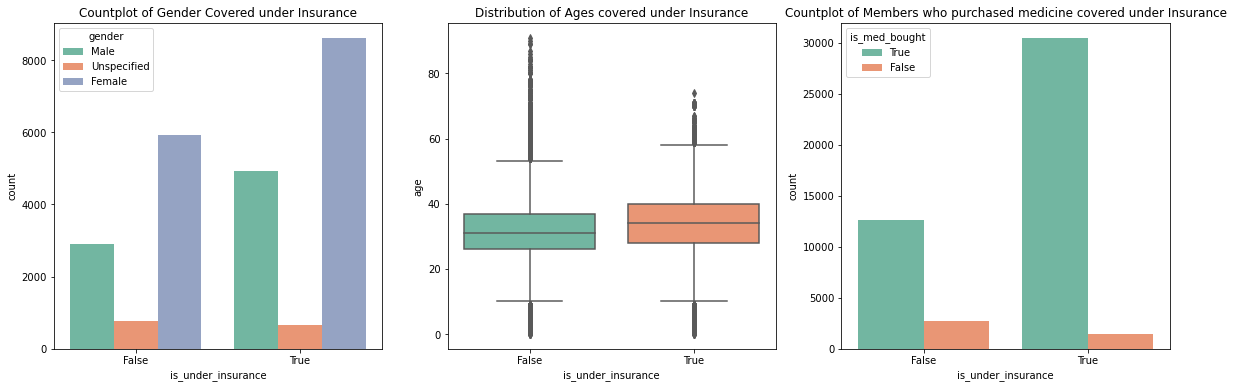

In [48]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (20,6), sharex = True)
sns.countplot(x = 'is_under_insurance',data = df1, palette = 'Set2', hue = 'gender', ax = ax0).set_title ("Countplot of Gender Covered under Insurance")
sns.boxplot(x ='is_under_insurance', y = 'age', data = df1, palette = 'Set2', ax = ax1).set_title ("Distribution of Ages covered under Insurance")
sns.countplot(x = 'is_under_insurance',data = df, palette = 'Set2', hue = 'is_med_bought', ax = ax2).set_title ("Countplot of Members who purchased medicine covered under Insurance")

From the plots above, most of the members under insurance are females and the age of those who bought insurance are slightly older than those who did not. Again, majority of the ages range around 25 to 40 years old, which may be attributed to the fact that they are more aware and knowledgeble about insurance. In addition, as majority of this age group are likely to be working, there could be company health insurnace purchased for them.  There was also a higher number of members who are covered under insurance and purchased medicine. This may be due to the reimbursement given by insurance, which makes them more willing to get medicine. 

Let us look at whether those who have or do not have insurance are mostly suffering from chronic diseases. 

In [49]:
# Create data subsets of those with insurance and those without
insured = df1.loc[df['is_under_insurance'] == True, :]
no_insured = df1.loc[df['is_under_insurance'] ==  False, :]

Text(0.5, 1.0, 'Members with Referral Letter issued Covered under Insurance')

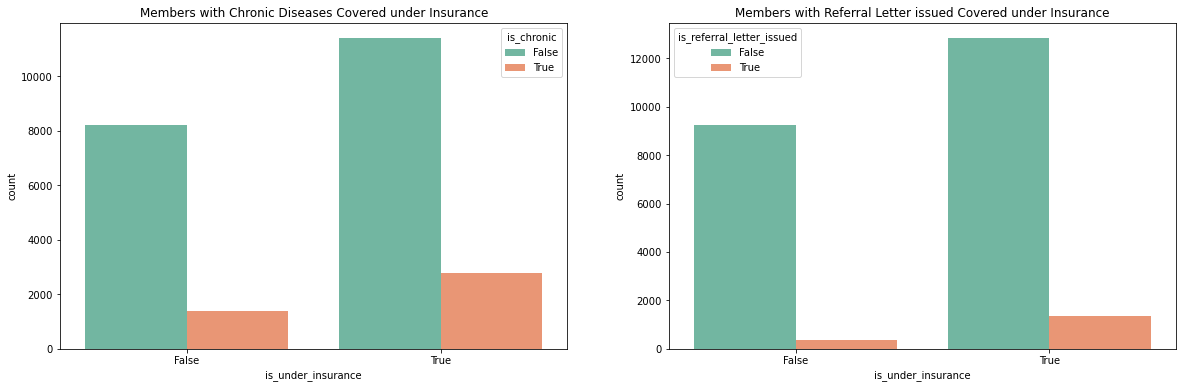

In [50]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'is_under_insurance',data = df1, palette = 'Set2', hue = 'is_chronic', ax = ax0).set_title ("Members with Chronic Diseases Covered under Insurance")
sns.countplot(x = 'is_under_insurance',data = df1, palette = 'Set2', hue = 'is_referral_letter_issued', ax = ax1).set_title ("Members with Referral Letter issued Covered under Insurance")

From the plots above, we can see that those covered under insurance has a higher proportion of chronic diseases and they also had a higher number of members issued with a referral letter. This is a good sign as more of those with chronic diseases are already covered under insurance. 

<AxesSubplot:title={'center':'Average No. of MC Days by Insurance Cover'}, xlabel='is_under_insurance'>

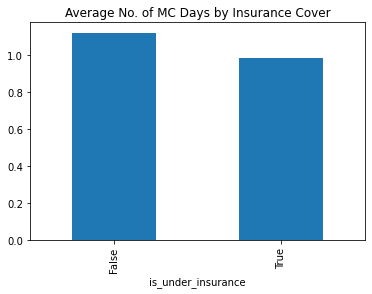

In [51]:
# Compare the average no. of MC days given for each group of non-insured and insured
df1.groupby('is_under_insurance')['mc_days'].mean().plot(kind = 'bar', title = 'Average No. of MC Days by Insurance Cover')

The average number of MC days seems to be a bit higher for those non-insured than insured. As the difference is not significant, it might not be a valuable insight.  

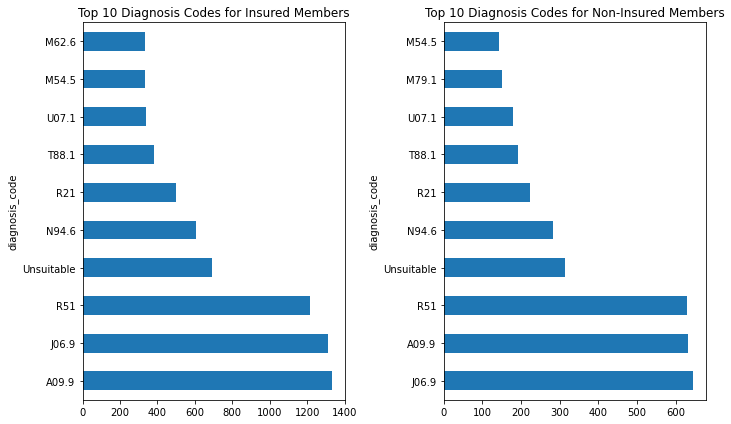

In [70]:
# Top 10 diagnosis codes for insured and non-insured members
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,6))
insured.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax0, title = 'Top 10 Diagnosis Codes for Insured Members')
no_insured.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax1, title = 'Top 10 Diagnosis Codes for Non-Insured Members')
plt.tight_layout()

The top 10 diagnoses for insured are : 
1. Muscle strain
2. Chronic lower back pain
3. Covid-19
4. Complications of immunization
5. Rash and non-specific skin eruption
6. Dysmenorrhea
7. Unsuitable
8. Headache
9. Acute upper respiratory infection
10. Gastroenteritis and colitis

The top 10 diagnoses for insured are : 
1. Soft tissue disorders
2. Chronic lower back pain
3. Covid-19
4. Complications of immunization
5. Rash and non-specific skin eruption
6. Dysmenorrhea
7. Unsuitable
8. Headache
9. Acute upper respiratory infection
10. Gastroenteritis and colitis


The top 10 diagnosis codes for both insured and non-insured are very similar, but it would be good to consider these medical conditions as part of the customised enagements for members. 


#### Finding out the top diagnoses by gender and age 

In [55]:
# Create data subsets for each gender 
female = df1.loc[df['gender']== 'Female', :]
male = df1.loc[df['gender']== 'Male', :]

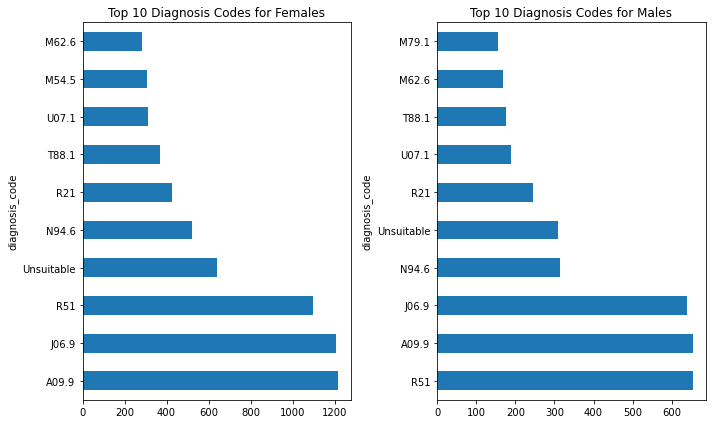

In [71]:
# Top 10 diagnosis codes
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,6))
female.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax0, title = 'Top 10 Diagnosis Codes for Females')
male.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax1, title = 'Top 10 Diagnosis Codes for Males')
plt.tight_layout()

The top 10 diagnoses for females are: 
1. Muscle strain
2. Chronic lower back pain
3. Covid-19
4. Complications of immunization
5. Rash and non-specific skin eruption
6. Dysmenorrhea
7. Unsuitable
8. Headache
9. Acute upper respiratory infection
10. Gastroenteritis and colitis

The top 10 diagnosis for males are:
1. Chronic lower back pain
2. Muscle Strain 
3. Complications of immunization
4. Covid 19 
5. Rash 
6. Dysmenorrhea
7. Unsuitable
8. Headache
9. Acute upper respiratory infection
10. Gastroenteritis and colitis

The top 10 diagnosis codes are still very similar.  

In [59]:
# Create data subsets for different age groups 
# We will split the ages into 3 groups : below 25, 25-45, above 45
df1['age_groups'] = pd.cut(x=df['age'], bins=[0, 25, 45, 100],
                    labels=['Below 25', '25 to 45', 'Above 45'])


In [62]:
# Create data subsets for each age groups
Below_25 = df1.loc[df1['age_groups']== 'Below 25', :]
majority_age = df1.loc[df1['age_groups']== '25 to 45', :]
Above_45 = df1.loc[df1['age_groups']== 'Above 45', :]

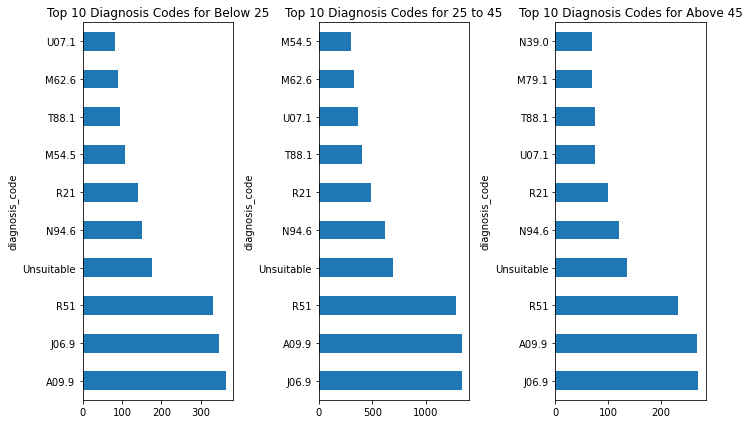

In [72]:
# Top 5 diagnosis code
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (10,6))
Below_25.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax0, title = 'Top 10 Diagnosis Codes for Below 25')
majority_age.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax1, title = 'Top 10 Diagnosis Codes for 25 to 45')
Above_45.groupby('diagnosis_code')['diagnosis_code'].count().sort_values(ascending = False).head(10).plot(kind='barh', ax = ax2, title = 'Top 10 Diagnosis Codes for Above 45')
plt.tight_layout()

The top 10 diagnoses for those below 25 and those 25 to 45 are the exactly the same and similar to those flagged out above. What is more interesting is that diagnoses for those above 45 are slightly different. 

Diagnosis codes that are under the age group of above 45 years old but not under other age groups are: 
- Other disorders of urinary system
- Soft tissue disorders

It seems that those above 45 are much more likely to get urinary systems disorders and soft tissue disorders, which can cause implications in the long term. It would be good to target this group of people and educate them on how to manage these medical conditions well and prevent it from turning into chronic diseases. 


In addition, for all different user groups, the top 10 diagnosis codes include 'Unsuitable'. This might mean that the condition is unsuitable for tele-consutation and that the patients should seek medical advice from a GP physically instead. Perhaps more can be done to educate members on the specific symtoms or conditions that are suitable/unsuitable for tele-consultation. Lesser unsuitable consultations will increase efficiency of the consultation process and increase consult revenue in the long run. 


**2. Does a specific group by gender or age tend to choose a specific delivery type?** 

    - If so, are they mostly suffering from chronic diseases?
    - Does having insurance affect their decision to choose a certain delivery type? 
    - Does it affect the consult revenue? 

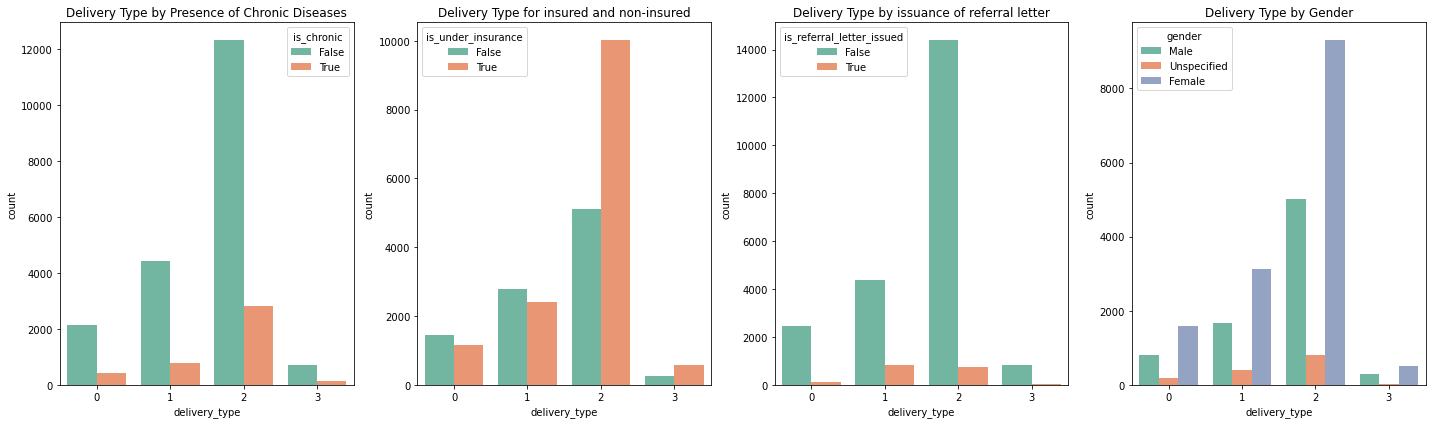

In [66]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (20,6))
sns.countplot(x = 'delivery_type',data = df1, palette = 'Set2',hue = 'is_chronic', ax = ax0).set_title ("Delivery Type by Presence of Chronic Diseases")
sns.countplot(x = 'delivery_type',data = df1, palette = 'Set2', hue = 'is_under_insurance', ax = ax1).set_title ("Delivery Type for insured and non-insured")
sns.countplot(x = 'delivery_type',data = df1, palette = 'Set2', hue = 'is_referral_letter_issued', ax = ax2).set_title ("Delivery Type by issuance of referral letter")
sns.countplot(x = 'delivery_type',data = df1, palette = 'Set2', hue = 'gender', ax = ax3).set_title ("Delivery Type by Gender")
plt.tight_layout()

Most members chose delivery type 2 - delivery within 6 hours regardless of gender, chronic diseases or insurance coverage. Those with referral letter are less lilely to purchase medicine and require any delivery method. 

Text(0.5, 1.0, 'Distribution of Age by Delivery Types')

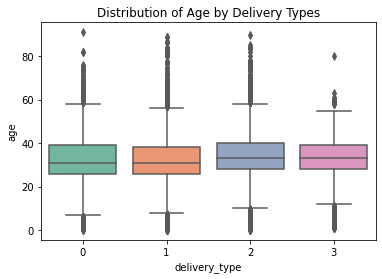

In [67]:
sns.boxplot(x = 'delivery_type', y = 'age', data = df1, palette = 'Set2').set_title('Distribution of Age by Delivery Types')

It seems like age does not really affect the decision made for delivery types. 

<AxesSubplot:title={'center':'Consult Revenue by Delivery Type'}, xlabel='delivery_type'>

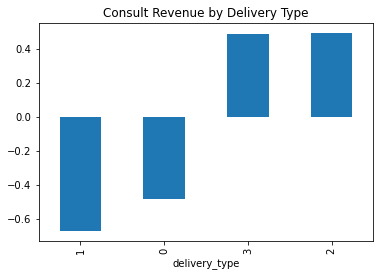

In [68]:
# calculate the mean consult revenue for each delivery type
df1.groupby('delivery_type')['consult_revenue'].mean().sort_values().plot(kind= 'bar', title= 'Consult Revenue by Delivery Type')

There seems to be only a small profit when members choose delivery type 2 and 3 , while there is a loss when members choose self-collect or no delivery


**3. Does a specific group by gender or age tend to bring in more consult revenue?**

    - What type of medicines do they usually get?
    - Would their decision to purchase medicine affect consult revenue as a whole? 
    - Would having insurance affect the consult revenue? 

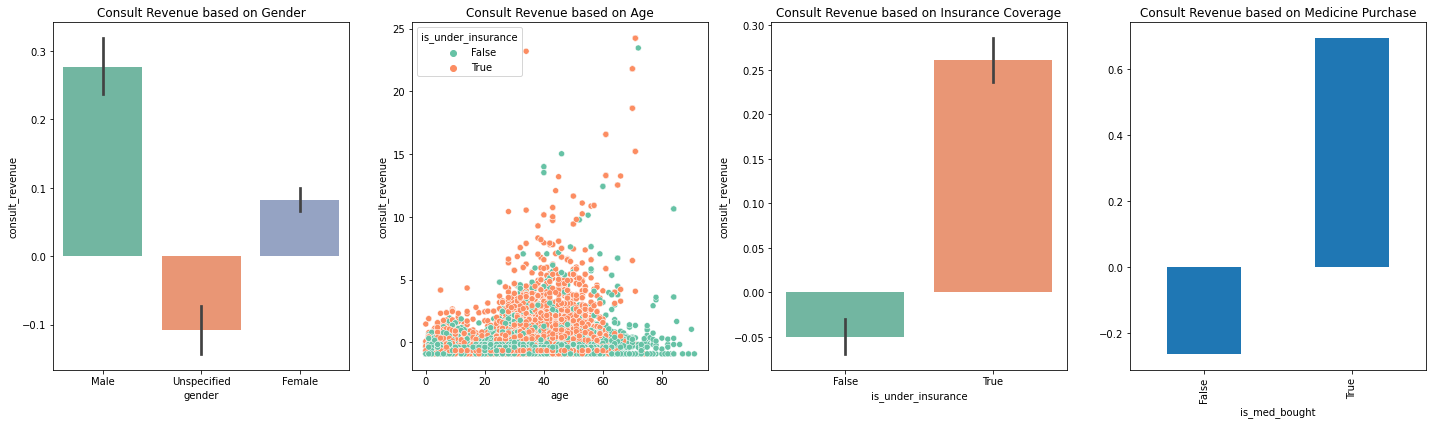

In [69]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (20,6))
sns.barplot(x = 'gender',y = 'consult_revenue', data = df1, palette = 'Set2', ax = ax0).set_title ("Consult Revenue based on Gender")
sns.scatterplot(x = 'age', y = 'consult_revenue', data = df1, palette = 'Set2', hue = 'is_under_insurance', ax = ax1).set_title ("Consult Revenue based on Age")
sns.barplot(x = 'is_under_insurance',y = 'consult_revenue', data = df1, palette = 'Set2', ax = ax2).set_title ("Consult Revenue based on Insurance Coverage")
df.groupby('is_med_bought')['consult_revenue'].mean().plot(kind = 'bar', ax = ax3, title = 'Consult Revenue based on Medicine Purchase')
plt.tight_layout()

From the plots above, consult revenue is higher:
- for males
- for those within the age group of 25 to 45 years old, which are the majority of the members 
- for those with insurance cover
- for members who purchased medicines

## 5. Recommendations 

Pls refer to the Analysis Report for the detailed recommendations based on the EDA results generated.